In [1]:
import tensorflow as tf
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

Using TensorFlow backend.


In [2]:
env = gym.make('CartPole-v0')

[2017-07-12 00:27:37,351] Making new env: CartPole-v0


In [21]:
state = env.reset()
for i in range(500):
    next_state, reward, done, _ = env.step(env.action_space.sample())
    print(reward)
    if done:
        print(i)
        break

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
11


In [3]:
lr = 0.001
mem_size = 2000
episodes = 2000
steps = 2000

epsilon = 1
epsilon_min = 0.01
epsilon_decay = 0.995
gamma = 0.95
batch_size = 32

In [4]:
bot = Sequential()
bot.add(Dense(units=24, input_dim=4, activation='relu'))
bot.add(Dense(units=24, activation='relu'))
bot.add(Dense(units=2, activation='linear'))
bot.compile(loss='mse', optimizer=Adam(lr))

memory = deque(maxlen=mem_size)

In [5]:
reward_list = []
for episode in range(episodes):
    state = env.reset()
    total_rewards = 0
    for step in range(steps):
        if epsilon >= np.random.rand():
            action = env.action_space.sample()
        else:
            action = np.argmax(bot.predict(np.reshape(state, (1, 4))))
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        memory.append((state, action, next_state, reward, done))
        total_rewards = total_rewards + reward
        state = next_state
        if done:
            reward_list.append(total_rewards)
            print('episode:{} steps:{} total_reward:{} epsilon:{}'.format(episode+1, step+1, total_rewards, epsilon))
            break
    
    minibatch = [memory[ii] for ii in np.random.choice(range(len(memory)), batch_size)]
    for state, action, next_state, reward, done in minibatch:
        target = reward
        if not done:
            target = reward + gamma * np.argmax(bot.predict(np.reshape(next_state, (1, 4))))
        target_act = bot.predict(np.reshape(state, (1, 4)))
        target_act[0][action] = target
        bot.fit( np.reshape(state, (1, 4)), target_act, epochs=1, verbose=0)
    if epsilon > epsilon_min:
        epsilon = epsilon * epsilon_decay

KeyboardInterrupt: 

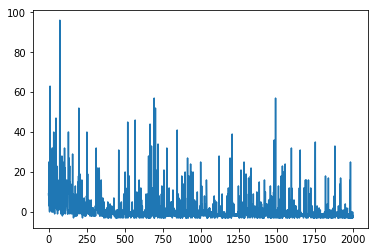

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(reward_list)